# **PNEUMONIA CLASSIFICATION DEEP LEARNING**

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
!pip install tensorflow

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.style.use('ggplot')

In [4]:
train_dir= './data/chest_Xray/train'
test_dir= './data/chest_Xray/test/'
val_dir= './data/chest_Xray/val/'

In [5]:
img_size=(128,128)
batch_size=32

In [6]:
def get_data(data_dir):
    return tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        color_mode='grayscale',
        image_size=(128,128),
        batch_size=32
    )

In [7]:
train = get_data(train_dir)
test = get_data(test_dir)
val = get_data(val_dir)

Found 5216 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [8]:
def display_image(dataset):
    plt.figure(figsize= (10,10))
    for images, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
            plt.title(dataset.class_names[labels[i]])
            plt.axis('off')


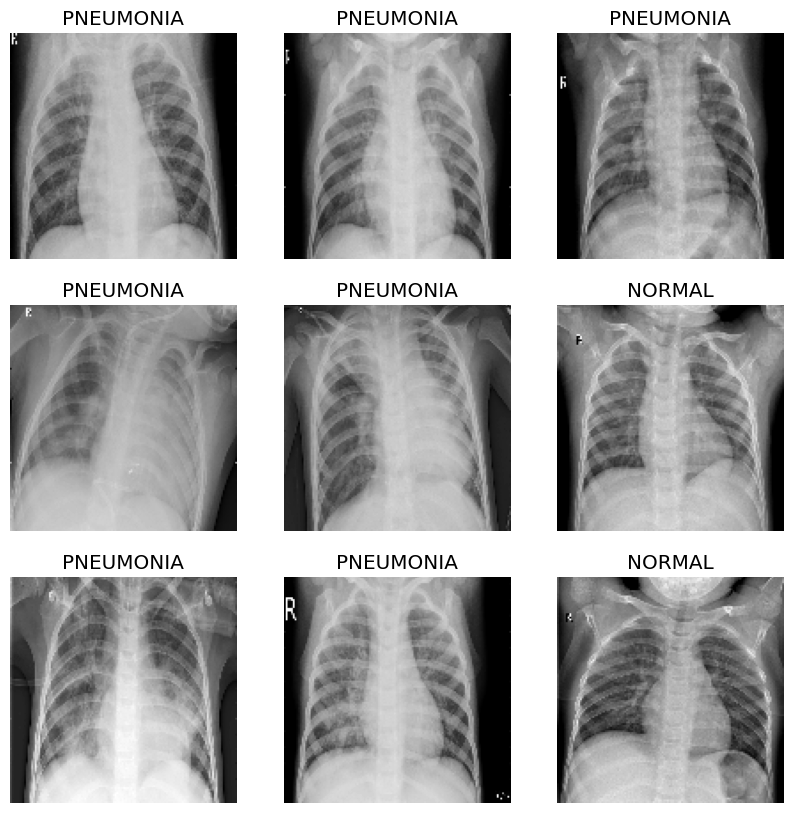

In [9]:
display_image(train)

In [10]:
def plot_distribution(dataset,title):
    labels = []
    for images, lbls in dataset:
        labels.extend(lbls.numpy())

    labels_count = {label: labels.count(label) for label in set(labels)}
    colors = ['skyblue', 'lightcoral']

    plt.bar(labels_count.keys(), labels_count.values(), color=colors)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Distribution of PNEUMONIA and NORMAL in {title} Dataset')
    plt.xticks(ticks=[0, 1], labels=["NORMAL", "PNEUMONIA"])
    plt.show()

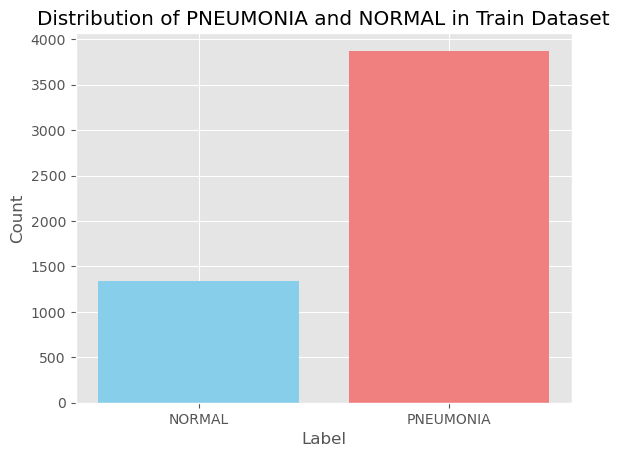

In [11]:
plot_distribution(train, 'Train')

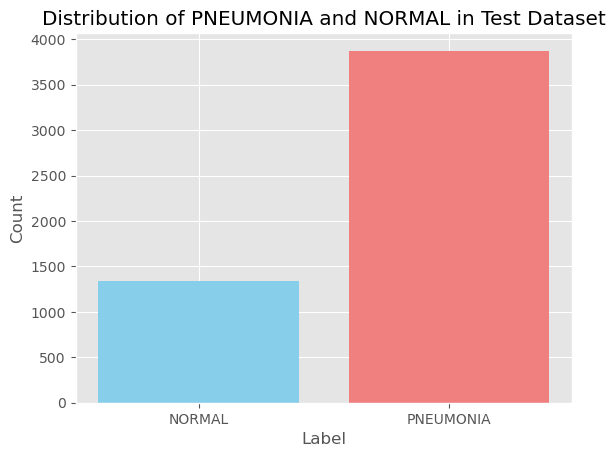

In [12]:
plot_distribution(test, 'Test')

In [13]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1))),
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


C:\Users\hadja\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,661,633 (6.34 MB)

 Trainable params: 1,661,633 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train,
                    epochs=10,
                    validation_data=val)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.8011 - loss: 12.5691 - val_accuracy: 0.9074 - val_loss: 0.2091
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 167ms/step - accuracy: 0.9480 - loss: 0.1421 - val_accuracy: 0.9486 - val_loss: 0.1258
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9707 - loss: 0.0787 - val_accuracy: 0.9816 - val_loss: 0.0523
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.9726 - loss: 0.0759 - val_accuracy: 0.9804 - val_loss: 0.0528
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.9677 - loss: 0.0872 - val_accuracy: 0.9812 - val_loss: 0.0493
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9788 - loss: 0.0560 - val_accuracy: 0.9845 - val_loss: 0.0409
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.9781 - loss: 0.0614 - val_accuracy: 0.9757 - val_loss: 0.0710
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9760 - loss: 

In [17]:
test_loss, test_acc = model.evaluate(test)

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9800 - loss: 0.0620
 60/163 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9793 - loss: 0.0630

In [18]:
print(f"Test accuracy: {test_acc:.2f}")

Test accuracy: 0.98


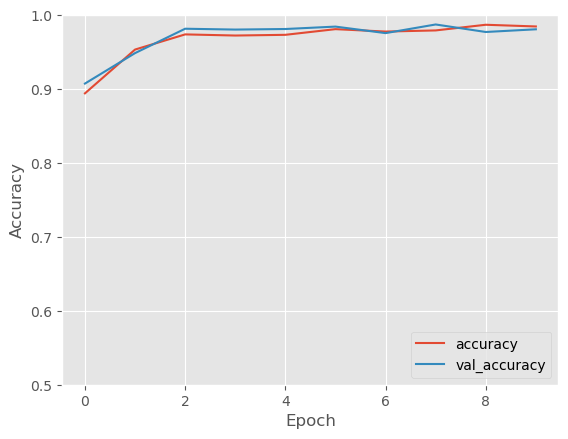

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.concatenate([y for x, y in val], axis=0)
y_pred = model.predict(val)
y_pred_classes = np.argmax(y_pred, axis=1)

163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step


In [21]:
print(classification_report(y_true, y_pred_classes, target_names=val.class_names, zero_division=0))

              precision    recall  f1-score   support

      NORMAL       0.26      1.00      0.41      1341
   PNEUMONIA       0.00      0.00      0.00      3875

    accuracy                           0.26      5216
   macro avg       0.13      0.50      0.20      5216
weighted avg       0.07      0.26      0.11      5216



# Analyse et interprétation

**1. Precision**


La précision pour la classe "NORMAL" est de 0.26, ce qui signifie que parmi les prédictions que le modèle a faites pour cette classe, seulement 26% étaient correctes. Pour la classe "PNEUMONIA", la précision est de 0.00, ce qui signifie que le modèle n'a fait aucune prédiction correcte pour cette classe.



**2. Recall**


Le rappel pour la classe "NORMAL" est de 1.00, ce qui signifie que le modèle a identifié correctement tous les échantillons de cette classe. Pour la classe "PNEUMONIA", le rappel est de 0.00, ce qui signifie que le modèle n'a identifié aucun échantillon de cette classe correctement.



**3. F1-score**

Le F1-score est la moyenne harmonique de la précision et du rappel. Pour la classe "NORMAL", le F1-score est de 0.41, et pour la classe "PNEUMONIA", il est de 0.00.


**Conclusion**


Le modèle a du mal à reconnaître les échantillons de "PNEUMONIA". C'est un signe typique de déséquilibre de classe, où le modèle préfère prédire la classe majoritaire ("NORMAL" dans ce cas).

# **Amélioration des performances du modèle**

**1. Rééchantillonnage : Méthode SMOTE**

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires. Pour éviter de réaliser un simple clonage des individus minoritaires, le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.

In [22]:
!pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
